#                                      Loan prediction Model¶
The two most pressing issues in the banking sector are: 1) How risky is the borrower? 2) Should we lend to the borrower given the risk? The response to the first question dictates the borrower's interest rate. Interest rate, among other things (such as time value of money), tests the riskiness of the borrower, i.e. the higher the interest rate, the riskier the borrower.

In [3]:
# Importing libraries
import os

# Dataproccesing 
import pandas as pd 
import numpy as np 

## Ploting Libraries
import matplotlib.pyplot as pp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
## ML Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 

In [5]:
df_train = pd.read_csv(r'C:\Users\nishu\Desktop\Dataset\train.csv')
df_test=pd.read_csv(r'C:\Users\nishu\Desktop\Dataset\test.csv')

In [6]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# EXPLORATATORY DATA ANALYSIS

In [8]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [9]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
print(f"Train dataset(row, col): {df_train.shape}")
print(f"Test dataset(row, col): {df_test.shape}")

Train dataset(row, col): (614, 13)
Test dataset(row, col): (367, 12)


In [11]:
## Column informations
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Co

In [12]:
# Stats summary
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
# Stats summary
df_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [14]:
df_train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
# Lets remove the Loan_ID Column which is not required in any instance of this project
df_train.drop('Loan_ID',axis=1,inplace=True)
df_test.drop('Loan_ID',axis=1,inplace=True)

In [16]:
# Columns with null values 

null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']


# Filling the null values of the columns with the mode value

for col in null_cols:
    print(f"{col}:\n{df_train[col].value_counts()}\n","-"*50)
    df_train[col] = df_train[col].fillna(
    df_train[col].dropna().mode().values[0] )


# After filling the null values 

print(f"After filling null values\n",'#'*50)
df_train.isnull().sum().sort_values(ascending=False)

Credit_History:
1.0    475
0.0     89
Name: Credit_History, dtype: int64
 --------------------------------------------------
Self_Employed:
No     500
Yes     82
Name: Self_Employed, dtype: int64
 --------------------------------------------------
LoanAmount:
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64
 --------------------------------------------------
Dependents:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
 --------------------------------------------------
Loan_Amount_Term:
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
 --------------------------------------------------
Gender:
Male      489
Female    112
Name: Gender, dtype: int64
 --------------------------------------------------
Married:
Yes    398
No   

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
# Numerical values 
num = df_train.select_dtypes('number').columns.to_list()

#Categorical values 
cat = df_train.select_dtypes('object').columns.to_list()

#Dataset 
loan_num = df_train[num]
loan_cat = df_train[cat]

# VISUALISATION

# Univariate Visual Analysis

Target Variable - Loan Status
We will start first with an independent variable which is our target variable as well. We will analyse this categorical variable using a bar chart as shown below. The bar chart shows that loan of 422 ( around 69 % ) people out of 614 was approved

Y    422
N    192
Name: Loan_Status, dtype: int64


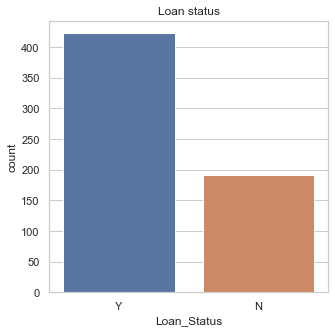

In [18]:
## Lets plot the Loan_Status columns first to know the propotion of accepted proposals and rejected ones 

print(df_train[cat[-1]].value_counts())
plt.figure(figsize=(5,5))
sns.set(style="whitegrid")
plt.title('Loan status')
sns.countplot(x=df_train[cat[-1]])
plt.show()

# Predictor Variables
There are 3 types of Independent Variables: Categorical, Ordinal & Numerical.

Categorical Features :
Gender
Marrital Status
Employment Type
Credit History

It can be inferred from the below bar plots that in our observed data:
80% of loan applicants are male in the training dataset.
Nearly 70% are married
About 75% of loan applicants are graduates
Nearly 85–90% loan applicants are self-employed
The loan has been approved for more than 65% of applicants.

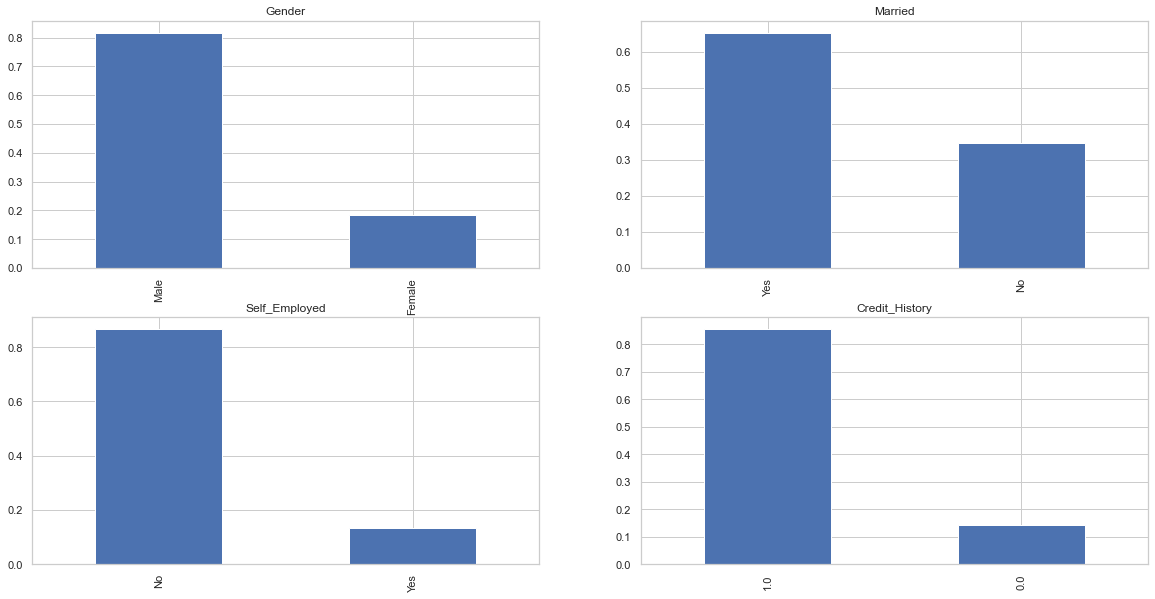

In [19]:
plt.subplot(221)
df_train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
df_train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
df_train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
df_train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

# Ordinal Features
Number of Dependents,
Education Level,
Property or Area Background.

Our Visual Analysis below, indecates that:
Almost 58% of the applicants have no dependents.
Highest number of applicants are from Semi Urban areas, followed by urban areas.
Around 80 % of the applicants are Graduate.

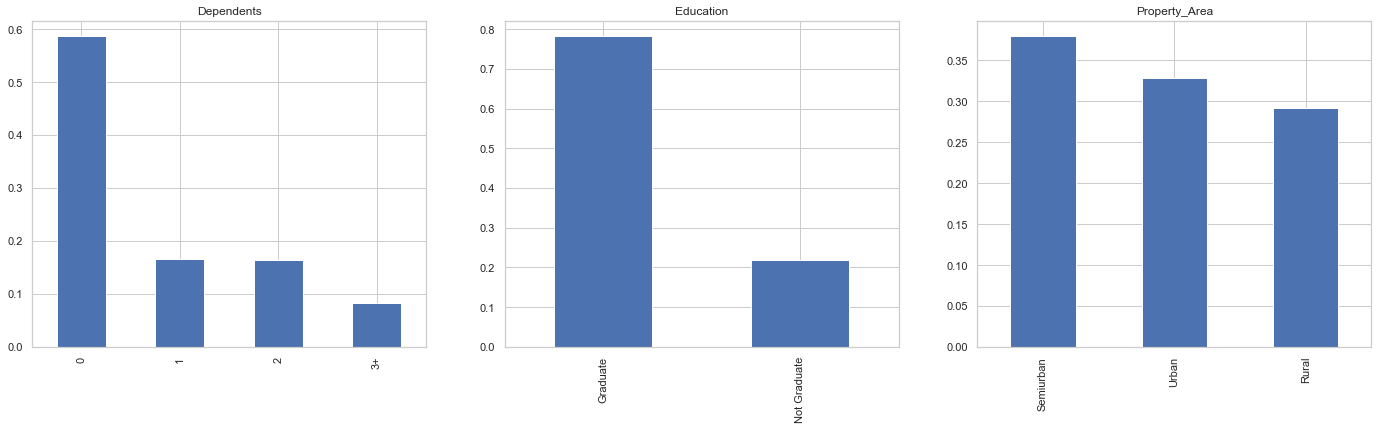

In [20]:
plt.subplot(131)
df_train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents') 
plt.subplot(132)
df_train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
df_train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

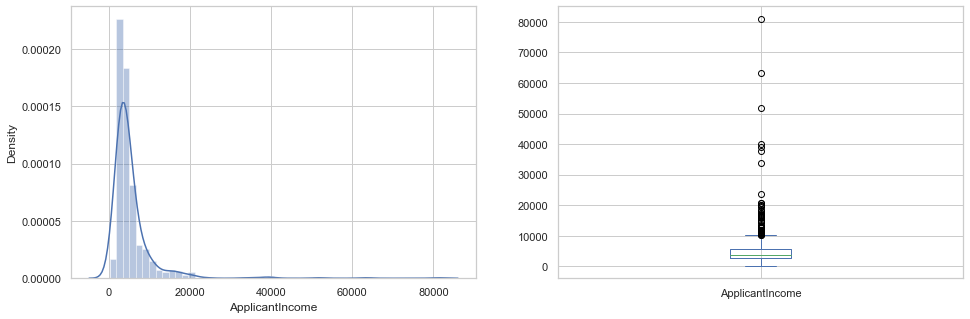

In [21]:
plt.subplot(121) 
sns.distplot(df_train['ApplicantIncome']); 
plt.subplot(122) 
df_train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

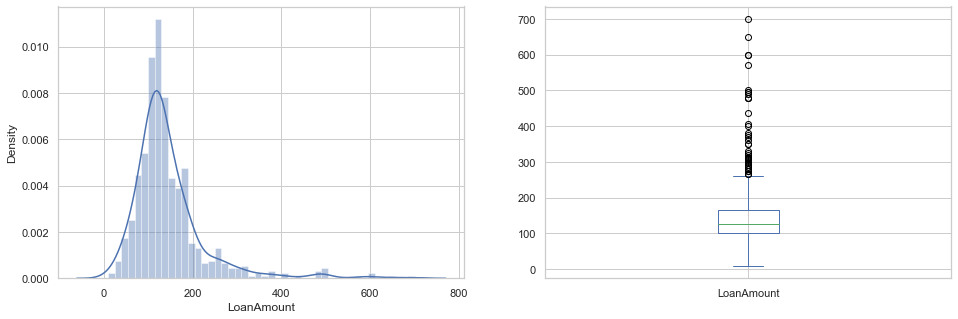

In [22]:
plt.subplot(121)
sns.distplot(df_train['LoanAmount']); 
plt.subplot(122)
df_train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

It can be inferred that most of the data in Applicant income is towards left which means it is not normally distributed. The boxplot confirms the presence of outliers. This can be attributed to income disparity in the society.

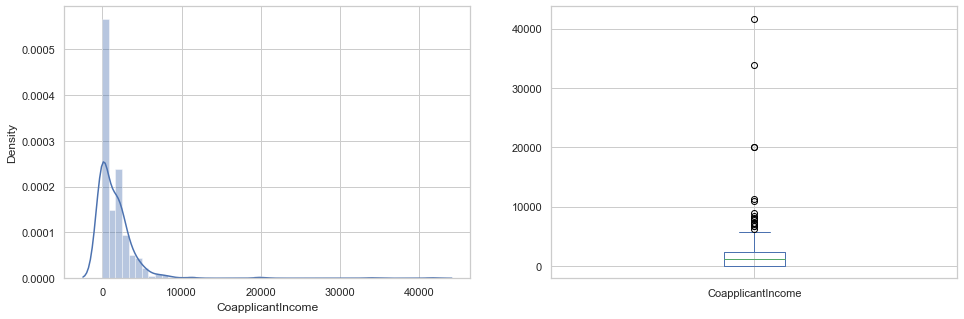

In [23]:
plt.subplot(121)
sns.distplot(df_train['CoapplicantIncome']); 
plt.subplot(122)
df_train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

CoapplicantIncome is lesser than applicantIncome and is within the 5000–15000, again with some outliers

# Bivariate Analysis
Bivariate analysis is finding some kind of empirical relationship between two variables. Specifically the dependent vs independent Variables

Categorical Independent Vs Target
Gender Vs Loan_Status

<AxesSubplot:xlabel='Gender'>

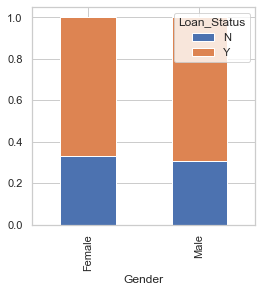

In [24]:
Gender=pd.crosstab(df_train['Gender'],df_train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(4,4))


There is not a substantial difference between male and female approval rates.

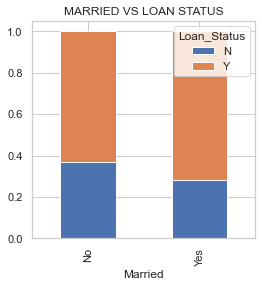

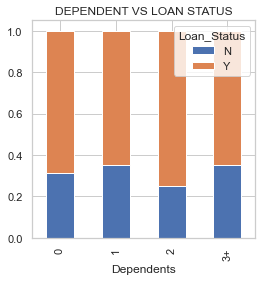

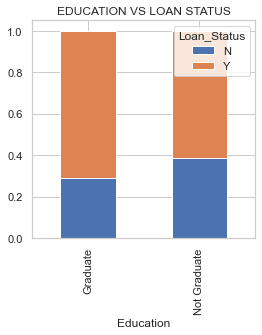

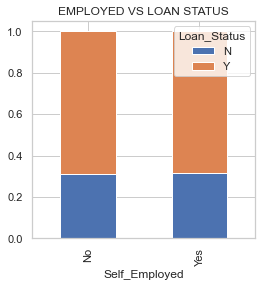

In [25]:
Married=pd.crosstab(df_train['Married'],df_train['Loan_Status']) 
Dependents=pd.crosstab(df_train['Dependents'],df_train['Loan_Status']) 
Education=pd.crosstab(df_train['Education'],df_train['Loan_Status']) 
Self_Employed=pd.crosstab(df_train['Self_Employed'],df_train['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True, figsize=(4,4), title='MARRIED VS LOAN STATUS') 
plt.show(38) 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(4,4),title='DEPENDENT VS LOAN STATUS')
plt.show(39) 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True ,figsize=(4,4),title='EDUCATION VS LOAN STATUS') 
plt.show(40) 
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True ,figsize=(4,4),title='EMPLOYED VS LOAN STATUS')
plt.show(41)

# There is not a substantial difference between male and female approval rates.


# Married applicants have a slightly higher chances of loan approval.

# Applicants with no dependents or 2 dependents have higher chances of approval. But this does not correlate well.

# Graduates have higher chance of loan approval compared to non-graduates.

# Self_Employed employees have slightly lower chances of loan approval but the situation is not that bad.

# It seems people with credit history as 1 are more likely to get their loans approved

# Propotion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

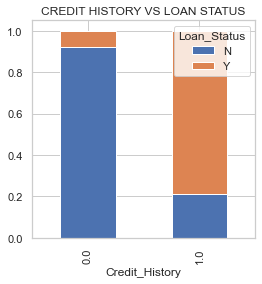

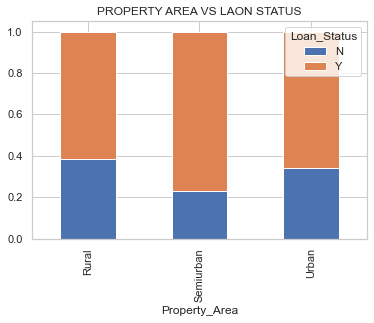

In [26]:
Credit_History=pd.crosstab(df_train['Credit_History'],df_train['Loan_Status']) 
Property_Area=pd.crosstab(df_train['Property_Area'],df_train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4),title='CREDIT HISTORY VS LOAN STATUS') 
plt.show(121) 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,title='PROPERTY AREA VS LAON STATUS') 
plt.show(122)


# Numerical Independent vs Target

Text(0.5, 1.0, 'APPLICANT INCOME VS LOAN STATUS')

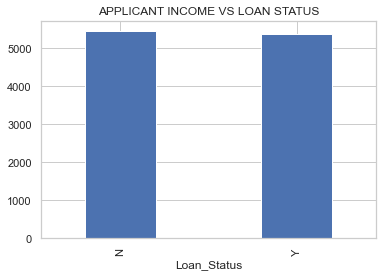

In [27]:
df_train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar(width=0.4)
plt.title('APPLICANT INCOME VS LOAN STATUS')

We tried to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved but we don't see any changes in the mean income. So we make bins for the applicant income variable based on the values in this and analyze the corresponding loan status for each bin

In [28]:
bins= [0,2500,4000,6000,81000]
group= ['Low', 'Average', 'High', 'Very high']
df_train['Applicant_Income_bin']=pd.cut(df_train['ApplicantIncome'],bins,labels=group)

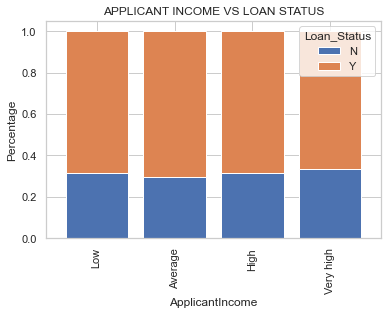

In [29]:
Applicant_Income_bin=pd.crosstab(df_train['Applicant_Income_bin'],df_train['Loan_Status']) 
Applicant_Income_bin.div(Applicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,width=0.8, title='APPLICANT INCOME VS LOAN STATUS') 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

It can be infered that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high, the chances of loan approval will also be high.

In [30]:
bins= [2500,4000,6000,81000]
group= ['Low', 'Average', 'High']
df_train['Coapplicant_Income_bin']=pd.cut(df_train['CoapplicantIncome'],bins,labels=group)

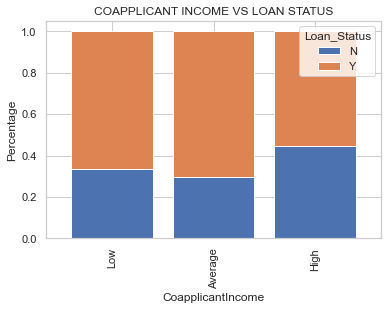

In [31]:
df_train['Coapplicant_Income_bin']=pd.cut(df_train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(df_train['Coapplicant_Income_bin'],df_train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,width=0.8, title='COAPPLICANT INCOME VS LOAN STATUS') 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

It shows that if the coapplicant's income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don't have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make new variable in which we will continue the applicant's and coapplicant's income to visualize the combined effect of income on loan approval.

In [32]:
df_train['Total_Income']=df_train['ApplicantIncome']+df_train['CoapplicantIncome']

In [33]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high'] 
df_train['Total_Income_bin']=pd.cut(df_train['Total_Income'],bins,labels=group)

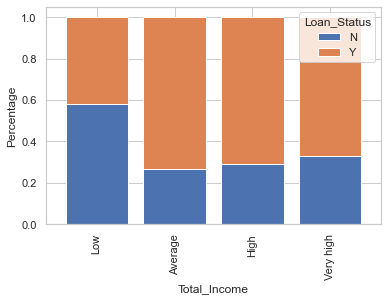

In [34]:
Total_Income_bin=pd.crosstab(df_train['Total_Income_bin'],df_train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,width=0.8) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with the Average, High and Very High Income.

In [35]:
bins=[0,100,200,700]
group=['Low','Average','High'] 
df_train['LoanAmount_bin']=pd.cut(df_train['LoanAmount'],bins,labels=group)

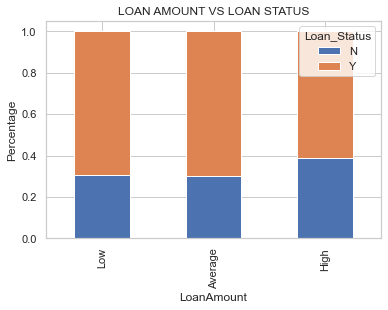

In [36]:
LoanAmount_bin=pd.crosstab(df_train['LoanAmount_bin'],df_train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,title='LOAN AMOUNT VS LOAN STATUS') 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we can considered that the chances of loan approval will be high when the loan amount is less.

In [37]:
df_train=df_train.drop(['Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','Total_Income'],axis=1)
df_train['Loan_Status'].replace('N',0, inplace=True)
df_train['Loan_Status'].replace('Y',1,inplace=True)

In [38]:
# Categorical labels

to_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,  
 'low':4,'Average':3,'high':2,'very high':1,
'3+': 3}

# adding the new numeric values from the to_numeric variable to both datasets
df_train= df_train.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)
df_test= df_test.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)


# converting the Dependents column
Dependents_ = pd.to_numeric(df_train.Dependents)
Dependents__ = pd.to_numeric(df_test.Dependents)

# Droping previous dependent columns
df_train.drop(['Dependents'], axis = 1, inplace = True)
df_test.drop(['Dependents'], axis = 1, inplace = True)

# Concating new Dependents column with datasets

df_train = pd.concat([df_train, Dependents_], axis = 1)
df_test= pd.concat([df_test, Dependents__], axis = 1)


# Checking info of both datasets
print(df_train.info(), "\n\n", df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                614 non-null    int64  
 1   Married               614 non-null    int64  
 2   Education             614 non-null    int64  
 3   Self_Employed         614 non-null    int64  
 4   ApplicantIncome       614 non-null    int64  
 5   CoapplicantIncome     614 non-null    float64
 6   LoanAmount            614 non-null    float64
 7   Loan_Amount_Term      614 non-null    float64
 8   Credit_History        614 non-null    float64
 9   Property_Area         614 non-null    int64  
 10  Loan_Status           614 non-null    int64  
 11  Applicant_Income_bin  614 non-null    object 
 12  Dependents            614 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 62.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to

<AxesSubplot:>

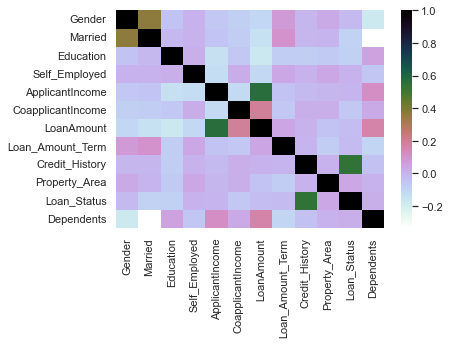

In [39]:
# Ploting the correaltion matrix
sns.heatmap(df_train.corr() ,cmap='cubehelix_r')

In [40]:
# Correlation table for better view
corr = df_train.corr()

corr.style.background_gradient(cmap="coolwarm")

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
Gender,1.000000,0.364569,-0.045364,-0.000525,-0.058809,-0.082912,-0.106404,0.074030,-0.009170,0.025752,-0.017987,-0.172914
Married,0.364569,1.000000,-0.012304,0.004489,-0.051708,-0.075948,-0.146212,0.100912,-0.010938,-0.004257,-0.091478,-0.334216
Education,-0.045364,-0.012304,1.000000,0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884,0.055752
Self_Employed,-0.000525,0.004489,0.010383,1.000000,-0.127180,0.016100,-0.114971,0.033739,0.001550,0.030860,0.003700,-0.056798
ApplicantIncome,-0.058809,-0.051708,-0.140760,-0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710,0.118202
CoapplicantIncome,-0.082912,-0.075948,-0.062290,0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187,0.030430
LoanAmount,-0.106404,-0.146212,-0.169436,-0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808,0.163017
Loan_Amount_Term,0.074030,0.100912,-0.073928,0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549,-0.103864
Credit_History,-0.009170,-0.010938,-0.073658,0.001550,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.001963,0.540556,-0.040160
Property_Area,0.025752,-0.004257,-0.065243,0.030860,-0.009500,0.010522,-0.047414,-0.076120,0.001963,1.000000,0.032112,-0.000244


Correlation&nbsp;between&nbsp;Quantitative&nbsp;Variables

Correlation&nbsp;between&nbsp;Quantitative&nbsp;Variables

In [41]:
import numpy as np
np.corrcoef(df_train['LoanAmount'], df_train['ApplicantIncome'])

array([[1.        , 0.56469817],
       [0.56469817, 1.        ]])

correlation between loan amount and applicant income is 56%

In [43]:
np.corrcoef(df_train['LoanAmount'], df_train['CoapplicantIncome'])

array([[1.        , 0.18972284],
       [0.18972284, 1.        ]])

correlation between loan amount and coapplicant income is 19 %

# Outlier Treatment

Due to outliers in the Loan Amount. the data in the loan amount is skewed towards the right, which means bulk of the data is towards the left. We remove this skewness by doing a log transformation. A log transformation doesn't effect affect the smaller values much but reduces the larger values. So the distribution becomes normal

<AxesSubplot:>

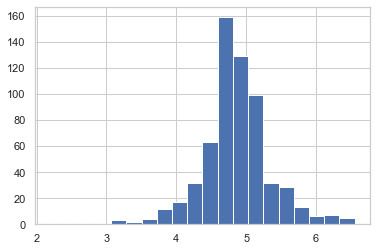

In [46]:
y=df_train.Loan_Status
Loan_data_V1=df_train.drop('Loan_Status',1)
df_train['LoanAmount_log']=np.log(df_train['LoanAmount'])
df_train['LoanAmount_log'].hist(bins=20)

In [47]:
Loan_data_V1=pd.get_dummies(Loan_data_V1)
df_train=pd.get_dummies(df_train)

In [48]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

model1=sm.Logit(y,Loan_data_V1 )
result=model1.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.464332
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                          Logit   Df Residuals:                      598
Method:                           MLE   Df Model:                           15
Date:                Fri, 04 Nov 2022   Pseudo R-squ.:                  0.2526
Time:                        23:57:15   Log-Likelihood:                -285.10
converged:                       True   LL-Null:                       -381.45
Covariance Type:            nonrobust   LLR p-value:                 6.463e-33
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Gender                             0.0891      0.291      0.306     

In [60]:
model_V1=LogisticRegression()
model_V1.fit(Loan_data_V1,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100,multi_class='ovr',n_jobs=1,penalty='12',random_state=1,solver='liblinear',tol=0.0001,verbose=0,warm_start=False)

df=pd.DataFrame({'odds_ratio':(np.exp(model_V1.coef_).T).tolist(),'variable':Loan_data_V1.columns.tolist()})
df['odds_ratio'] = df['odds_ratio'].str.get(0)

df=df.sort_values('odds_ratio', ascending=False)
df

,odds_ratio,variable
8,23.930099,Credit_History
11,1.216064,LoanAmount_log
12,1.169860,Applicant_Income_bin_3
14,1.088647,Applicant_Income_bin_Low
3,1.074965,Self_Employed
9,1.001482,Property_Area
4,1.000013,ApplicantIncome
5,0.999937,CoapplicantIncome
6,0.997579,LoanAmount
7,0.997106,Loan_Amount_Term


larger value of odds ratio indicate that the independent varibale is a good predictor of target variable. In our case the association between the credit history and loan status is strongest

In [61]:
predicted_1 = model_V1.predict(Loan_data_V1)
accuracy_score(y,predicted_1)

0.8110749185667753

# Accuracy of the model created is around 81 %

In [54]:
Loan_data_V2 = df_train.filter(['Credit_History'], axis=1)
Loan_data_V2=pd.get_dummies(Loan_data_V2)

In [55]:
model2=sm.Logit(y,Loan_data_V2 )

result2=model2.fit()

print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.539390
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                          Logit   Df Residuals:                      613
Method:                           MLE   Df Model:                            0
Date:                Sat, 05 Nov 2022   Pseudo R-squ.:                  0.1318
Time:                        00:18:33   Log-Likelihood:                -331.19
converged:                       True   LL-Null:                       -381.45
Covariance Type:            nonrobust   LLR p-value:                       nan
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Credit_History     1.3278      0.107     12.381      0.000       1.118       1.538


In [57]:
from sklearn.linear_model import LogisticRegression
model_V2=LogisticRegression()
model_V2.fit(Loan_data_V2,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100,multi_class='ovr',n_jobs=1,penalty='12',random_state=1,solver='liblinear',tol=0.0001,verbose=0,warm_start=False)

df=pd.DataFrame({'odds_ratio':(np.exp(model_V2.coef_).T).tolist(),'variable':Loan_data_V2.columns.tolist()})
df['odds_ratio'] = df['odds_ratio'].str.get(0)

df=df.sort_values('odds_ratio', ascending=False)
df

,odds_ratio,variable
0,27.69363,Credit_History


In [62]:
Loan_data_V3 = Loan_data_V1.drop(['ApplicantIncome'], axis=1)
Loan_data_V3 =pd.get_dummies(Loan_data_V3)

In [63]:
model3=sm.Logit(y,Loan_data_V3 )

result3=model3.fit()

print(result3.summary())

Optimization terminated successfully.
         Current function value: 0.465169
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                          Logit   Df Residuals:                      599
Method:                           MLE   Df Model:                           14
Date:                Sat, 05 Nov 2022   Pseudo R-squ.:                  0.2512
Time:                        00:26:51   Log-Likelihood:                -285.61
converged:                       True   LL-Null:                       -381.45
Covariance Type:            nonrobust   LLR p-value:                 2.757e-33
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Gender                             0.0848      0.291      0.292     

In [64]:
model_V3=LogisticRegression()
model_V3.fit(Loan_data_V3,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100,multi_class='ovr',n_jobs=1,penalty='12',random_state=1,solver='liblinear',tol=0.0001,verbose=0,warm_start=False)

df=pd.DataFrame({'odds_ratio':(np.exp(model_V3.coef_).T).tolist(),'variable':Loan_data_V3.columns.tolist()})
df['odds_ratio'] = df['odds_ratio'].str.get(0)

df=df.sort_values('odds_ratio', ascending=False)
df

,odds_ratio,variable
7,28.245471,Credit_History
11,1.191128,Applicant_Income_bin_3
13,1.114031,Applicant_Income_bin_Low
8,1.097161,Property_Area
9,1.026419,Dependents
4,0.999933,CoapplicantIncome
5,0.999347,LoanAmount
6,0.999305,Loan_Amount_Term
0,0.991136,Gender
10,0.957596,LoanAmount_log


In [65]:
predicted_3 = model_V3.predict(Loan_data_V3)
accuracy_score(y,predicted_3)

0.8110749185667753

# Accuracy of second model is 81 %

In [67]:
Loan_data_V4 = df_train.filter(['Credit_History', 'CoapplicantIncome'], axis=1)
Loan_data_V4=pd.get_dummies(Loan_data_V4)

In [68]:
model4=sm.Logit(y,Loan_data_V4 )

result4=model4.fit()

print(result4.summary())

Optimization terminated successfully.
         Current function value: 0.530149
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                          Logit   Df Residuals:                      612
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Nov 2022   Pseudo R-squ.:                  0.1466
Time:                        00:29:16   Log-Likelihood:                -325.51
converged:                       True   LL-Null:                       -381.45
Covariance Type:            nonrobust   LLR p-value:                 3.818e-26
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Credit_History        1.5175      0.126     12.004      0.000       1.270       1.765
Coapplic

In [69]:
model_V4 = LogisticRegression()
model_V4.fit(Loan_data_V4,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100,multi_class='ovr',n_jobs=1,penalty='12',random_state=1,solver='liblinear',tol=0.0001,verbose=0,warm_start=False)

df=pd.DataFrame({'odds_ratio':(np.exp(model_V4.coef_).T).tolist(),'variable':Loan_data_V4.columns.tolist()})
df['odds_ratio'] = df['odds_ratio'].str.get(0)

df=df.sort_values('odds_ratio', ascending=False)
df

,odds_ratio,variable
0,28.048905,Credit_History
1,0.999948,CoapplicantIncome


In [70]:
predicted_4 = model_V4.predict(Loan_data_V4)
accuracy_score(y,predicted_4)

0.8127035830618893

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Loan_data_V4, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [73]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [74]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_predict = DT.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
DT_SC = accuracy_score(y_predict,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.57      0.47      0.52        51
           1       0.81      0.87      0.84       134

    accuracy                           0.76       185
   macro avg       0.69      0.67      0.68       185
weighted avg       0.75      0.76      0.75       185

75.68% Accurate


In [76]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.59      0.47      0.52        51
           1       0.81      0.87      0.84       134

    accuracy                           0.76       185
   macro avg       0.70      0.67      0.68       185
weighted avg       0.75      0.76      0.75       185

76.22% Accurate


# Conclusion:
We did Exploratory data Analysis on the features of this dataset and saw how each feature is distributed.
We did bivariate and multivariate analysis to see imapct of one another on their features using charts.
We analysed each variable to check if data is cleaned and normally distributed.
We cleaned the data and removed NA values
We calculated correaltion between independent variables and found that applicant income and loan amount have significant relation.
We created dummy variables for constructing the model
We constructed models taking different variables into account and found through odds ratio that credit credit history is creating the most impact on loan giving decision
Finally, we got a model with coapplicant income and credit history as independent variable with highest accuracy.
We tested the data and got the accuracy of 83 %